In [1]:
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv"

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load sunspots data
sunspots = pd.read_csv(url, index_col='Month', parse_dates=True)

# Fit SARIMA model
model = SARIMAX(sunspots['Sunspots'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Generate forecast
forecast = results.get_forecast(steps=24)




c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [27]:
model_fit = model.fit()
# one step forecast
yhat = model_fit.predict(start=len(sunspots), end=len(sunspots))

In [32]:
yhat

1984-01-01    37.792266
Freq: MS, dtype: float64

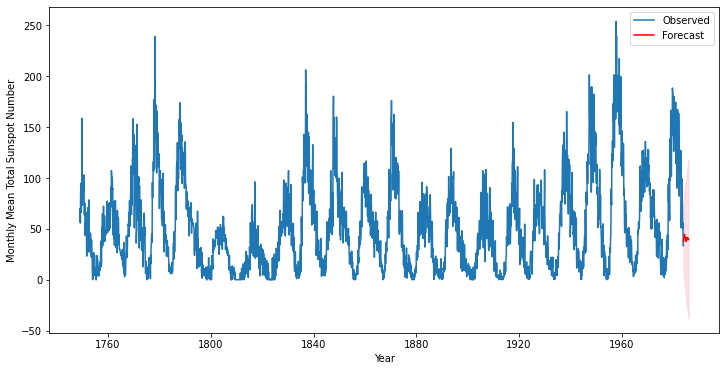

In [31]:
# Plot results
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(sunspots.index, sunspots['Sunspots'], label='Observed')
ax.plot(forecast.predicted_mean.index, forecast.predicted_mean, color='red', label='Forecast')
ax.fill_between(forecast.predicted_mean.index,  forecast_ci['lower Sunspots'], forecast_ci['upper Sunspots'], color='pink', alpha=0.5)
ax.set_xlabel('Year')
ax.set_ylabel('Monthly Mean Total Sunspot Number')
ax.legend()
plt.show()